## Crop Brain Region Visualization

This notebook is dedicated to the visualization of the crop brain region transformation that will be used for data preprocessing among with other transformations.

Visualization is useful for checking that it works as expected and make it easier to understand.

### Imports and constants

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sklearn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import albumentations
import albumentations.pytorch
import tqdm
import shap
import importlib
import utils.load_images
import preprocessing.crop_brain_region

torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
sklearn.random.seed(0)

IMAGE_SIZE = (224, 224)

#### Run the notebook from the root of the repo, to use imports and folders from there.

In [2]:
os.chdir(os.pardir)
print(os.getcwd())

/Users/humbertoyusta/classes/industrial-ml/brain-tumor-detection


#### Download the dataset if it is not downloaded yet

In [3]:
import kaggle

data_folder = "data"

os.makedirs(data_folder, exist_ok=True)

kaggle.api.authenticate()

kaggle.api.dataset_download_files(
    "volodymyrpivoshenko/brain-mri-scan-images-tumor-detection",
    path=data_folder,
    unzip=True,
)

Dataset URL: https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection


#### Loading images

In [4]:
images, labels = utils.load_images.load_images()

### Plotting procedure of cropping brain region

In [17]:
def plot_brain_crop_images(image):
    image, contour_image, bounding_box_image, resized_image = (
        preprocessing.crop_brain_region.CropBrainRegion(
            output_size=IMAGE_SIZE, return_everything=True
        )(image=image)["image"]
    )

    plt.figure(figsize=(5, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.imshow(contour_image)
    plt.title("Contour of Brain Region")

    plt.subplot(2, 2, 3)
    plt.imshow(bounding_box_image)
    plt.title("Bounding Box of Brain Region")

    plt.subplot(2, 2, 4)
    plt.imshow(resized_image)
    plt.title("Cropped and Resized Image")

    plt.tight_layout()
    plt.show()

#### Example of cropping brain region on an image with no tumor

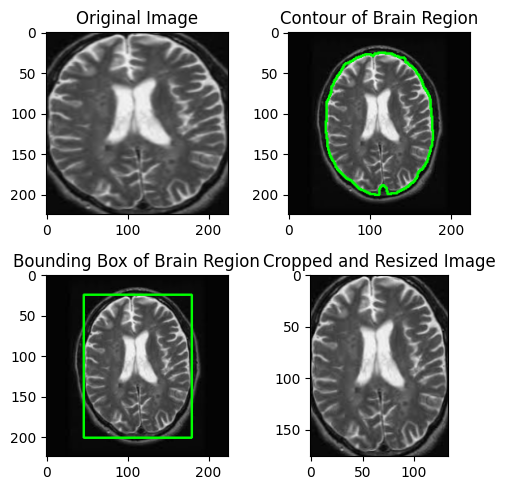

In [19]:
plot_brain_crop_images(images[labels == 0][0])

#### Example of cropping brain region on an image with tumor

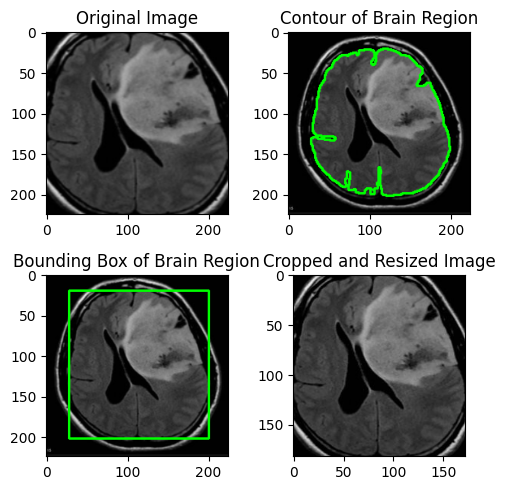

In [20]:
plot_brain_crop_images(images[labels == 1][0])

### Showing original images and cropped versions

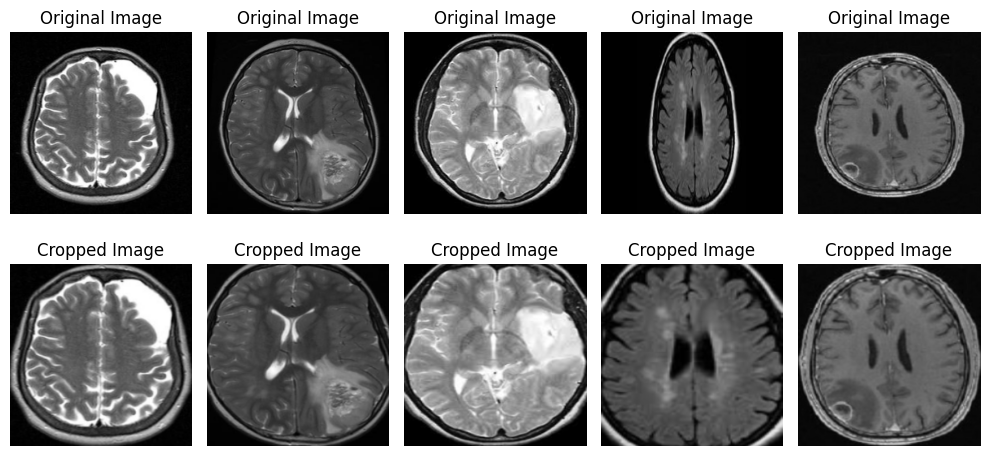

In [22]:
crop_transform = preprocessing.crop_brain_region.CropBrainRegion(output_size=IMAGE_SIZE)

imgs_to_show = np.concatenate(
    (images[labels == 1][15:18], images[labels == 0][15:17]), axis=0
)
cropped_imgs = [crop_transform(image=img)["image"] for img in imgs_to_show]

plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs_to_show[i])
    plt.title("Original Image")
    plt.axis("off")

for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(cropped_imgs[i])
    plt.title("Cropped Image")
    plt.axis("off")

plt.tight_layout()
plt.show()